In [2]:
import json
import os
import re
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt

In [3]:
all_files = os.listdir('SimulationData/')

In [151]:
generic = [f for f in all_files if 'all_generic_obs_phi' in f]
generic_2x_spot_area = [f for f in all_files if 'all_gen2xspot_area_ob' in f]
generic_2x_spot_num = [f for f in all_files if 'all_gen2xspot_num_obs' in f]
generic_both = [f for f in all_files if 'all_gen_both' in f]
pole_spot_cont = [f for f in all_files if 'pole_spot_contrast' in f]
eq_spot_cont = [f for f in all_files if 'eq_spot_contrast' in f]
pole_butterfly_lat = [f for f in all_files if 'pole_butterfly_lat' in f]
eq_butterfly_lat = [f for f in all_files if 'eq_butterfly_lat' in f]
minima_uniform = [f for f in all_files if 'all_minima_uniform_obs_phi' in f]
minima = [f for f in all_files if 'all_minima_obs' in f]
maxima_uniform = [f for f in all_files if 'all_maxima_uniform_obs_phi' in f]
maxima = [f for f in all_files if 'all_maxima_obs' in f]

In [15]:
def recover_data(content):
    '''
    Recovers corrupted data
    '''
    regex_pattern = r'"(.*?)": (\[.*?\]|-?\d+\.\d+|true|false|null)'
    match = re.findall(regex_pattern, content)

    xs_std = np.float64(match[0][1])
    ys_std = np.float64(match[1][1])
    
    xs_std_err = np.float64(match[2][1])
    ys_std_err = np.float64(match[3][1])

    xs_std_ci_lower, xs_std_ci_upper = ast.literal_eval(match[4][1])
    ys_std_ci_lower, ys_std_ci_upper = ast.literal_eval(match[5][1])

    return [xs_std, ys_std, xs_std_err, ys_std_err, xs_std_ci_lower, xs_std_ci_upper, ys_std_ci_lower, ys_std_ci_upper]

In [195]:
pole_butterfly_lat

['pole_butterfly_lat0.0.json',
 'pole_butterfly_lat10.0.json',
 'pole_butterfly_lat15.0.json',
 'pole_butterfly_lat20.0.json',
 'pole_butterfly_lat25.0.json',
 'pole_butterfly_lat30.0.json',
 'pole_butterfly_lat35.0.json',
 'pole_butterfly_lat40.0.json',
 'pole_butterfly_lat45.0.json',
 'pole_butterfly_lat5.0.json',
 'pole_butterfly_lat50.0.json',
 'pole_butterfly_lat55.0.json',
 'pole_butterfly_lat60.0.json',
 'pole_butterfly_lat65.0.json',
 'pole_butterfly_lat70.0.json',
 'pole_butterfly_lat75.0.json']

In [207]:
# fix maxima
df = pd.DataFrame(columns=['obs_phi',
    'xs_std', 'ys_std', 'xs_std_err', 'ys_std_err', 
    'xs_std_ci_lower', 'xs_std_ci_upper', 
    'ys_std_ci_lower', 'ys_std_ci_upper'
])

for i in range(len(maxima)):
    with open('SimulationData/' + maxima[i], "r") as file:
        content = file.read()
        match = int(re.search(r'_phi_(\d+)', maxima[i]).group(1))
        # match = np.float64(re.search(r'_lat([\d.]+)', eq_butterfly_lat[i]).group(1)[:-1])
        df.loc[len(df)] = [match] + recover_data(content)


df.to_csv('maxima.csv')
df

,obs_phi,xs_std,ys_std,xs_std_err,ys_std_err,xs_std_ci_lower,xs_std_ci_upper,ys_std_ci_lower,ys_std_ci_upper
0,0.0,0.231608,0.137210,0.002430,0.001537,0.226866,0.236353,0.134207,0.140216
1,1.0,0.215108,0.127828,0.002089,0.001673,0.211047,0.219191,0.124687,0.131205
2,10.0,0.219966,0.127475,0.002255,0.001247,0.215535,0.224446,0.125057,0.129860
3,11.0,0.233443,0.134951,0.002322,0.001332,0.228810,0.237980,0.132356,0.137546
4,12.0,0.228604,0.128759,0.002406,0.001341,0.224005,0.233395,0.126142,0.131494
...,...,...,...,...,...,...,...,...,...
86,87.0,0.206043,0.205341,0.002092,0.002076,0.201889,0.210100,0.201252,0.209429
87,88.0,0.200372,0.200069,0.002171,0.002161,0.196272,0.204683,0.195795,0.204252
88,89.0,0.190421,0.190349,0.001896,0.001889,0.186714,0.194093,0.186640,0.194127
89,9.0,0.226594,0.133237,0.002228,0.001455,0.222197,0.230959,0.130405,0.136138


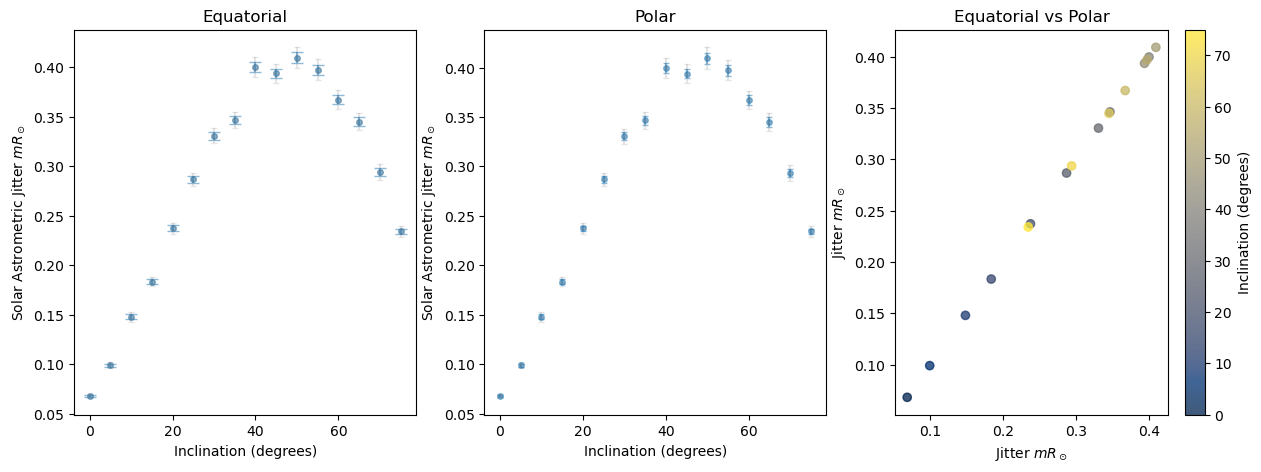

In [205]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.errorbar(df['band_lat'], df['xs_std'], yerr=df['xs_std_err'], fmt='o', color='tab:blue',
             alpha=0.5, capsize=4, label='1 sigma (std dev)', markersize = 4)

plt.errorbar(df['band_lat'], df['xs_std'],  yerr=[df['xs_std'] - df['xs_std_ci_lower'], df['xs_std_ci_upper'] - df['xs_std']], 
             fmt='o', color='gray', alpha=0.2, capsize=2, label='95% CI', markersize = 4)
# plt.ylim([0.08, 0.18])
plt.xlabel('Inclination (degrees)')
plt.ylabel(r'Solar Astrometric Jitter $mR_\odot$')
plt.title('Equatorial')

plt.subplot(1,3,2)
plt.errorbar(df['band_lat'], df['ys_std'], yerr=df['ys_std_err'], fmt='o', color='tab:blue',
             alpha=0.5, capsize=2, label='1 sigma (std dev)', markersize = 4)

plt.errorbar(df['band_lat'], df['ys_std'], yerr=[df['ys_std'] - df['ys_std_ci_lower'], df['ys_std_ci_upper'] - df['ys_std']], 
             fmt='.', color='gray', alpha=0.2, capsize=2, label='95% CI', markersize = 4)
plt.xlabel('Inclination (degrees)')
plt.ylabel(r'Solar Astrometric Jitter $mR_\odot$')
plt.title('Polar')

# plt.ylim([0.08, 0.18])

plt.subplot(1,3,3)

plt.scatter(df['xs_std'], df['ys_std'], c = df['band_lat'].values, cmap = 'cividis', alpha = 0.75)
plt.xlabel(r'Jitter $mR_\odot$')
plt.ylabel(r'Jitter $mR_\odot$')
plt.title('Equatorial vs Polar')

plt.colorbar(label = 'Inclination (degrees)')
# plt.xlim([0.11, 0.18])
# plt.ylim([0.08, 0.16])
